### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.10.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
train_Y = tf.keras.utils.to_categorical(trainY, num_classes=10)
test_Y = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(train_Y.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


In [9]:
train_Y.shape

(60000, 10)

In [10]:
test_Y.shape

(10000, 10)

In [11]:
trainX = trainX / 255.0
testX = testX / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

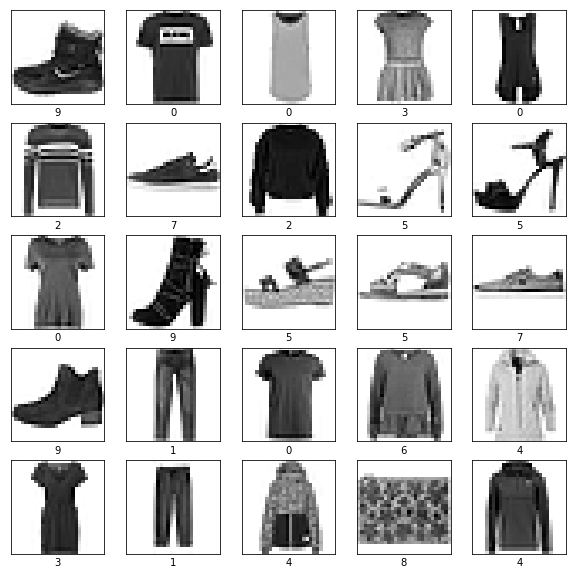

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization

In [14]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [15]:
history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 1.0317 - acc: 0.6765 - val_loss: 0.7423 - val_acc: 0.7501
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.6559 - acc: 0.7844 - val_loss: 0.6257 - val_acc: 0.7875
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.5742 - acc: 0.8091 - val_loss: 0.5758 - val_acc: 0.8047
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.5333 - acc: 0.8204 - val_loss: 0.5525 - val_acc: 0.8120
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.5072 - acc: 0.8292 - val_loss: 0.5326 - val_acc: 0.8120


In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


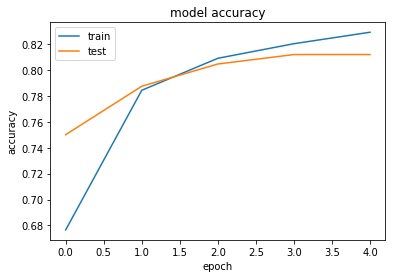

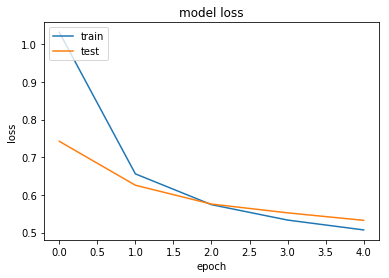

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 97us/step
Accuracy:  0.8119999965131283


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [19]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(BatchNormalization(input_shape=(13,)))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [20]:
history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 341us/step - loss: 0.5527 - acc: 0.8033 - val_loss: 0.4123 - val_acc: 0.8481
Epoch 2/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.4292 - acc: 0.8425 - val_loss: 0.3786 - val_acc: 0.8609
Epoch 3/5
60000/60000 [==============================] - 19s 316us/step - loss: 0.3897 - acc: 0.8574 - val_loss: 0.3713 - val_acc: 0.8635
Epoch 4/5
60000/60000 [==============================] - 19s 314us/step - loss: 0.3668 - acc: 0.8648 - val_loss: 0.3555 - val_acc: 0.8685
Epoch 5/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.3489 - acc: 0.8696 - val_loss: 0.3574 - val_acc: 0.8711


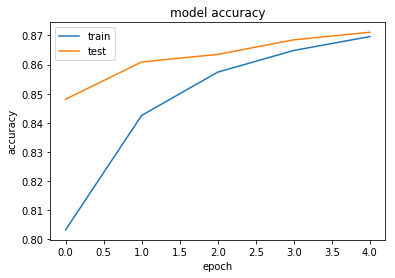

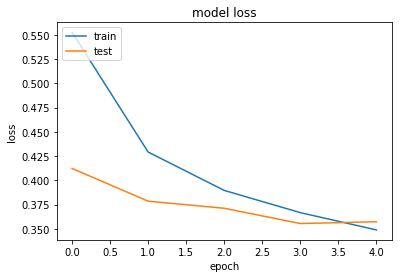

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 125us/step
Accuracy:  0.8710999933481216


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [23]:
sgd_optimizer = SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 326us/step - loss: 0.3112 - acc: 0.8853 - val_loss: 0.3306 - val_acc: 0.87841s -
Epoch 2/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.3034 - acc: 0.8878 - val_loss: 0.3302 - val_acc: 0.8811
Epoch 3/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.3043 - acc: 0.8887 - val_loss: 0.3296 - val_acc: 0.8793
Epoch 4/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.3007 - acc: 0.8891 - val_loss: 0.3271 - val_acc: 0.8803
Epoch 5/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.2975 - acc: 0.8905 - val_loss: 0.3274 - val_acc: 0.8828


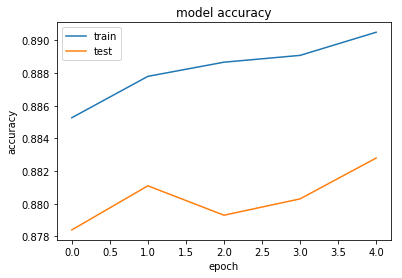

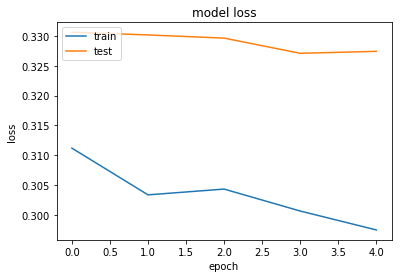

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [26]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(Dense(units=100,activation="sigmoid"))
model.add(Dense(units=100,activation="sigmoid"))
model.add(Dense(units=10,activation="softmax"))


In [27]:
sgd_optimizer = SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.9467 - acc: 0.6717 - val_loss: 0.6028 - val_acc: 0.7839
Epoch 2/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.5296 - acc: 0.8096 - val_loss: 0.5062 - val_acc: 0.8147
Epoch 3/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.4644 - acc: 0.8342 - val_loss: 0.4777 - val_acc: 0.8289
Epoch 4/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.4307 - acc: 0.8455 - val_loss: 0.4501 - val_acc: 0.8375
Epoch 5/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.4079 - acc: 0.8538 - val_loss: 0.4320 - val_acc: 0.8468


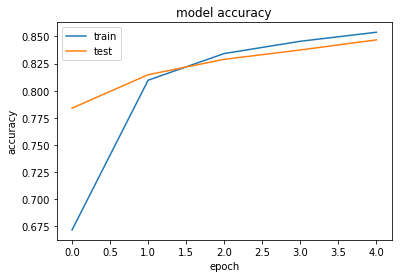

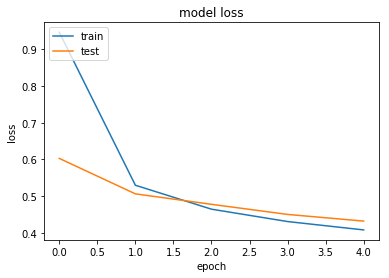

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 118us/step
Accuracy:  0.8467999945282936


## Review model

### Run the model